# Linear Regression

## Load Data 

Load Data from 'Advertising.csv'.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv("Advertising.csv")

##Load Data into models values.

Let us assume:

$X = (TV Advertisement)$

$Z = (Radio Advertisement)$

$Y = (Sales)$



In [ ]:
X = data["TV"]
Z = data["Radio"]
Y = data['Sales']

##Preprocessing Data

Normalizing Data for $X$, $Z$ and $Y$.

From here on, we will consider: $X$, $Z$ and $Y$ to be normalized.

In [ ]:
import numpy as np

#Normalizing Data in X
X = (X - np.mean(X))/ np.std(X)
#Normalizing Data in Z
Z = (Z - np.mean(Z))/ np.std(Z)
#Normalizing Data in Y
Y = (Y - np.mean(Y))/ np.std(Y)

## Initializing Features to some given values

For the model, we have 5 features: $\theta_{0}, \theta_{1}, \theta_{2}, \theta_{3}, \theta_{4}$

We also initialize, $\eta$ here.


In [ ]:
theta = [0.2,0.1,0.3,0.4,0.2]
eta = 0.1

## Forming Cost Function and Gradients, as per features.

We create cost function as per the given equation in the question.
Given Equation is:
$$Y=\theta_{0}+\theta_{1}X + \theta_{2}X^2 + \theta_{3}Z + \theta_{4}Z^2$$


1. The first step is to define the loss function:


>$J= \frac{1}{Training Data Size}\sum_{Training Data} (\hat{y}-y)^2$

>>$\hat{y}$ is the predicted value

>>$y$ is the actual value

2. The second step is to find the deravative of the cost function with respect to the weights (Model parameters)

>$J= \frac{1}{Training Data Size}\sum_{Training Data} (\theta_{0}+\theta_{1}X + \theta_{2}X^2 + \theta_{3}Z + \theta_{4}Z^2-y)^2$
>>$\frac{dJ}{d\theta_{0}} = \frac{1}{Training Data Size}\sum_{Training Data} 2(\theta_{0}+\theta_{1}X + \theta_{2}X^2 + \theta_{3}Z + \theta_{4}Z^2-y)$
>>$\frac{dJ}{d\theta_{1}} = \frac{1}{Training Data Size}\sum_{Training Data} 2(\theta_{0}+\theta_{1}X + \theta_{2}X^2 + \theta_{3}Z + \theta_{4}Z^2-y)(X)$
>>$\frac{dJ}{d\theta_{2}} = \frac{1}{Training Data Size}\sum_{Training Data} 2(\theta_{0}+\theta_{1}X + \theta_{2}X^2 + \theta_{3}Z + \theta_{4}Z^2-y)(X^2)$
>>$\frac{dJ}{d\theta_{3}} = \frac{1}{Training Data Size}\sum_{Training Data} 2(\theta_{0}+\theta_{1}X + \theta_{2}X^2 + \theta_{3}Z + \theta_{4}Z^2-y)(Z)$
>>$\frac{dJ}{d\theta_{4}} = \frac{1}{Training Data Size}\sum_{Training Data} 2(\theta_{0}+\theta_{1}X + \theta_{2}X^2 + \theta_{3}Z + \theta_{4}Z^2-y)(Z^2)$

Updating the weights (Slope and Intercept)
>>$\theta_{0} = \theta_{0} -\eta \frac{dJ}{d\theta_{0}}$

>>$\theta_{1} = \theta_{1} -\eta \frac{dJ}{d\theta_{1}}$

>>$\theta_{2} = \theta_{2} -\eta \frac{dJ}{d\theta_{2}}$

>>$\theta_{3} = \theta_{3} -\eta \frac{dJ}{d\theta_{3}}$

>>$\theta_{4} = \theta_{4} -\eta \frac{dJ}{d\theta_{4}}$


## Training model to decrease the cost function, iteratively.

Here, we train the model to iteratively minimize the cost function, for the given theta values.

We start by taking the 'training data size' as the size of set $X$. As the size of the other variables has to be the same for the given set of training data. So, we pick the size of any one.

In [ ]:
#The 'training data size' is represented by the variable : 'tds'
tds = len(X)

J_all = []

for i in range(100):
  J = 0
  J_theta = [0,0,0,0,0]

  for j in range(tds):
    J = J + (1/tds)*(theta[0] + theta[1]*X[i] + theta[2]*(X[i]*X[i]) + theta[3]*Z[i] + theta[4]*(Z[i]*Z[i]) - Y[i])**2
    J_theta[0] += (1/tds)*2*(theta[0] + theta[1]*X[i] + theta[2]*(X[i]*X[i]) + theta[3]*Z[i] + theta[4]*(Z[i]*Z[i]) - Y[i])
    J_theta[1] += (1/tds)*2*(theta[0] + theta[1]*X[i] + theta[2]*(X[i]*X[i]) + theta[3]*Z[i] + theta[4]*(Z[i]*Z[i]) - Y[i])*(X[i])
    J_theta[2] += (1/tds)*2*(theta[0] + theta[1]*X[i] + theta[2]*(X[i]*X[i]) + theta[3]*Z[i] + theta[4]*(Z[i]*Z[i]) - Y[i])*(X[i]*X[i])
    J_theta[3] += (1/tds)*2*(theta[0] + theta[1]*X[i] + theta[2]*(X[i]*X[i]) + theta[3]*Z[i] + theta[4]*(Z[i]*Z[i]) - Y[i])*(Z[i])
    J_theta[4] += (1/tds)*2*(theta[0] + theta[1]*X[i] + theta[2]*(X[i]*X[i]) + theta[3]*Z[i] + theta[4]*(Z[i]*Z[i]) - Y[i])*(Z[i]*Z[i])
  
  J_all.append(J)
  theta[0] -= eta*J_theta[0]
  theta[1] -= eta*J_theta[1]
  theta[2] -= eta*J_theta[2]
  theta[3] -= eta*J_theta[3]
  theta[4] -= eta*J_theta[4]

print("Final Value of J: ",J_all[-1])

Final Value of J:  0.8241094078701949


## Plot of Cost Function Vs Iteration Number

Here, I have plotted the values of the cost function, represented by 'J' against the iterations used for finding the minimum value of 'J'.

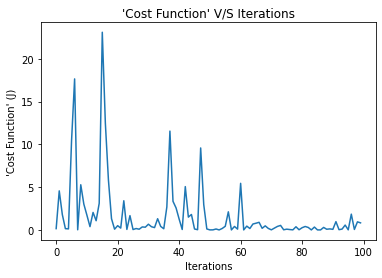

In [ ]:
plt.title("'Cost Function' V/S Iterations")
plt.xlabel("Iterations")
plt.ylabel("'Cost Function' (J)")
plt.plot(J_all)

## Plot of Sales V/S variables it depends on: TV and Radio Advertisements

Here, I plot the values of 'Sales' against the values of 'TV Advertisement' and 'Radio Advertisements', on which 'Sales' depend upon.

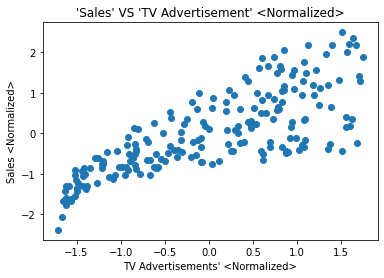

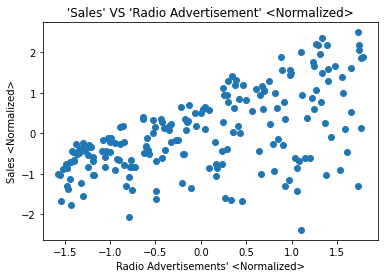

In [ ]:
plt.title("'Sales' VS 'TV Advertisement' <Normalized>")
plt.xlabel("TV Advertisements' <Normalized>")
plt.ylabel("Sales <Normalized>")
plt.scatter(X,Y)
plt.figure()
plt.title("'Sales' VS 'Radio Advertisement' <Normalized>")
plt.xlabel("Radio Advertisements' <Normalized>")
plt.ylabel("Sales <Normalized>")
plt.scatter(Z,Y)

## Predicting the total sales and plotting 'TV ads' VS 'Sales'

Here, I use the values of $\theta_{0}-\theta_{4}$ to predict the value of total sales.

Then, I plot the normalized values of 'TV ads' against 'Sales'.

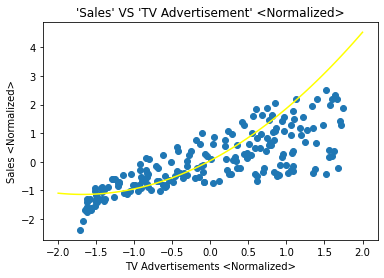

In [ ]:
Spending = np.linspace(-2,2,100)
Predicted_Me = theta[0]+ theta[1]*Spending + theta[2]*Spending*Spending + theta[3]*Spending + theta[4]*Spending*Spending
plt.title("'Sales' VS 'TV Advertisement' <Normalized>")
plt.xlabel('TV Advertisements <Normalized>')
plt.ylabel("Sales <Normalized>")
plt.scatter(X,Y)
plt.plot(Spending,Predicted_Me,color='yellow')

## Conclusion

The above project show how we can preprocess data in order to fit polynomial features, using Linear Regression.